# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [56]:
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE',parse_dates=True)

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [57]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [59]:
df.describe()

,IPN31152N
count,573.000
mean,109.896
std,27.951
min,58.660
25%,88.936
50%,107.643
75%,128.278
max,196.174


In [60]:
df.columns = ['Production']

<AxesSubplot:xlabel='DATE'>

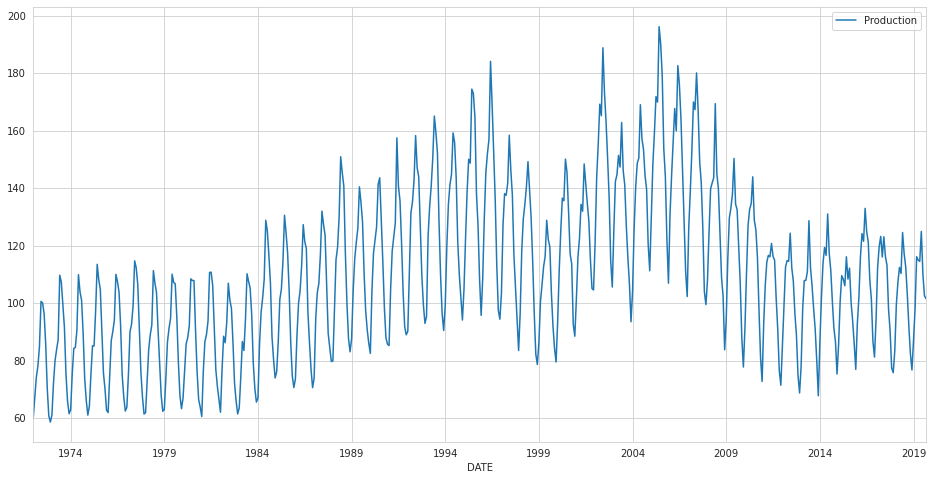

In [61]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [62]:
test_size = 24

In [63]:
test_ind = len(df)- test_size

In [64]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

### Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [66]:
scaler = RobustScaler()

In [67]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [68]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [69]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [70]:
X, y = generator[0]

In [71]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[-1.20017484 -1.02236662 -0.84264963 -0.74553306 -0.57891441 -0.18232213
 -0.19408784 -0.2884139  -0.55293567 -0.93887944 -1.17900809 -1.2327992 ]
Predict this y: 
 [[-1.17168365]]


## Modelling & Model Performance

### Import related libraries

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
n_features = train_scaled.shape[1]

### Creating Model

### with "tanh" activation function

In [74]:
model = Sequential()
model.add(LSTM(128, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(64, activation = 'tanh', return_sequences=True))
model.add(LSTM(32, activation = 'tanh', return_sequences=True))
model.add(LSTM(16, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 12, 64)            49408     
                                                                 
 lstm_6 (LSTM)               (None, 12, 32)            12416     
                                                                 
 lstm_7 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 131,537
Trainable params: 131,537
Non-trainable params: 0
_________________________________________________________________


In [76]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [77]:
model.fit_generator(generator,epochs = 15,validation_data = validation_generator,callbacks = [early_stop])

Epoch 1/15
537/537 [==============================] - 24s 31ms/step - loss: 0.1971 - val_loss: 0.0304
Epoch 2/15
537/537 [==============================] - 15s 28ms/step - loss: 0.1638 - val_loss: 0.0363
Epoch 3/15
537/537 [==============================] - 15s 28ms/step - loss: 0.1381 - val_loss: 0.0608
Epoch 4/15
537/537 [==============================] - 15s 28ms/step - loss: 0.1088 - val_loss: 0.0325
Epoch 5/15
537/537 [==============================] - 15s 28ms/step - loss: 0.0798 - val_loss: 0.0233
Epoch 6/15
537/537 [==============================] - 15s 28ms/step - loss: 0.0721 - val_loss: 0.0294
Epoch 7/15
537/537 [==============================] - 15s 28ms/step - loss: 0.0682 - val_loss: 0.0229
Epoch 8/15
537/537 [==============================] - 15s 28ms/step - loss: 0.0530 - val_loss: 0.0278
Epoch 9/15
537/537 [==============================] - 15s 28ms/step - loss: 0.0519 - val_loss: 0.0202
Epoch 10/15
537/537 [==============================] - 17s 31ms/step - loss: 0.046

<AxesSubplot:>

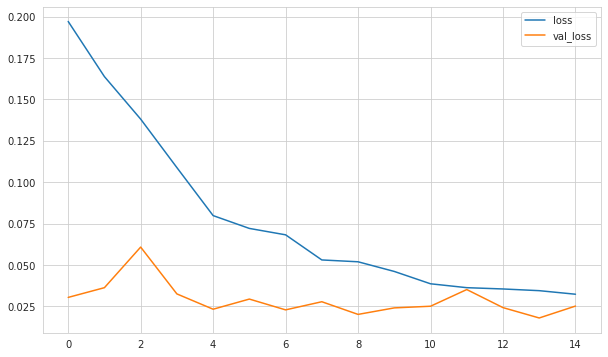

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [81]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

#### Inverse Transformations and Comparing

In [82]:
predictions = scaler.inverse_transform(predictions_scaled)

In [83]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

,Production,Predictions_tanh
DATE,,
2017-10-01,90.473,89.187
2017-11-01,77.438,80.996
2017-12-01,75.812,80.714
2018-01-01,83.434,94.870
2018-02-01,99.490,107.350
2018-03-01,107.315,115.463
2018-04-01,112.431,121.635
2018-05-01,110.354,125.663
2018-06-01,124.584,128.127


<AxesSubplot:xlabel='DATE'>

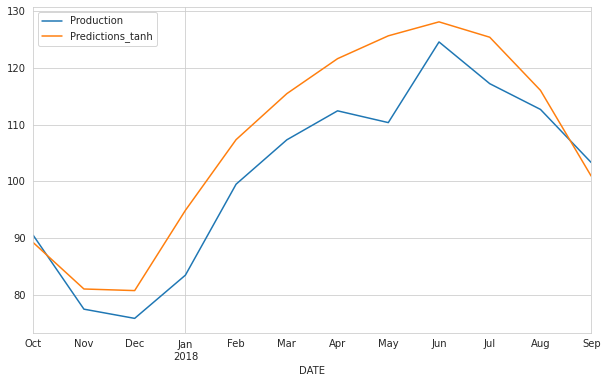

In [84]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [85]:
eval_metrics(compare.Production, compare.Predictions_tanh)

r2_score: 0.7480070759514529 
mae: 6.600014593462148 
mse: 59.42514424609343 
rmse: 7.708770605362014


### with "relu" activation function

In [86]:
model = Sequential()
model.add(LSTM(128, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(64, activation = 'relu', return_sequences=True))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 12, 128)           66560     
                                                                 
 lstm_9 (LSTM)               (None, 12, 64)            49408     
                                                                 
 lstm_10 (LSTM)              (None, 12, 32)            12416     
                                                                 
 lstm_11 (LSTM)              (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 131,537
Trainable params: 131,537
Non-trainable params: 0
_________________________________________________________________


In [88]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [89]:
model.fit_generator(generator,epochs = 15,validation_data = validation_generator,callbacks = [early_stop])

Epoch 1/15
537/537 [==============================] - 21s 28ms/step - loss: 0.2760 - val_loss: 0.0289
Epoch 2/15
537/537 [==============================] - 14s 26ms/step - loss: 0.1127 - val_loss: 0.0180
Epoch 3/15
537/537 [==============================] - 15s 28ms/step - loss: 0.0821 - val_loss: 0.0249
Epoch 4/15
537/537 [==============================] - 14s 26ms/step - loss: 0.0779 - val_loss: 0.0158
Epoch 5/15
537/537 [==============================] - 14s 26ms/step - loss: 0.0751 - val_loss: 0.0164
Epoch 6/15
537/537 [==============================] - 14s 26ms/step - loss: 0.0764 - val_loss: 0.0119
Epoch 7/15
537/537 [==============================] - 14s 27ms/step - loss: 0.0754 - val_loss: 0.0247
Epoch 8/15
537/537 [==============================] - 14s 27ms/step - loss: 0.0707 - val_loss: 0.0139
Epoch 9/15
537/537 [==============================] - 14s 27ms/step - loss: 0.0709 - val_loss: 0.0123
Epoch 10/15
537/537 [==============================] - 15s 27ms/step - loss: 0.069

<AxesSubplot:>

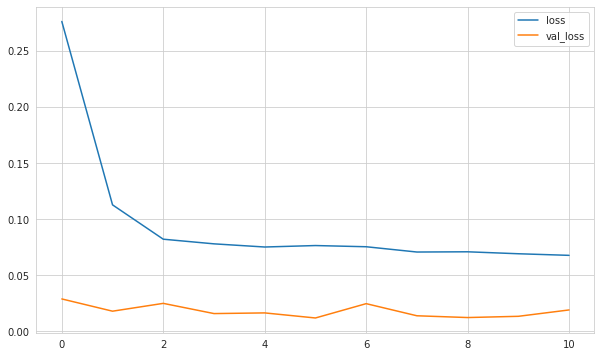

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [91]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

#### Inverse Transformations and Comparing

In [92]:
predictions = scaler.inverse_transform(predictions_scaled)

In [93]:
compare['Predictions_relu'] = predictions
compare

,Production,Predictions_tanh,Predictions_relu
DATE,,,
2017-10-01,90.473,89.187,101.619
2017-11-01,77.438,80.996,89.448
2017-12-01,75.812,80.714,86.091
2018-01-01,83.434,94.870,97.696
2018-02-01,99.490,107.350,112.915
2018-03-01,107.315,115.463,117.886
2018-04-01,112.431,121.635,119.700
2018-05-01,110.354,125.663,115.232
2018-06-01,124.584,128.127,119.042


<AxesSubplot:xlabel='DATE'>

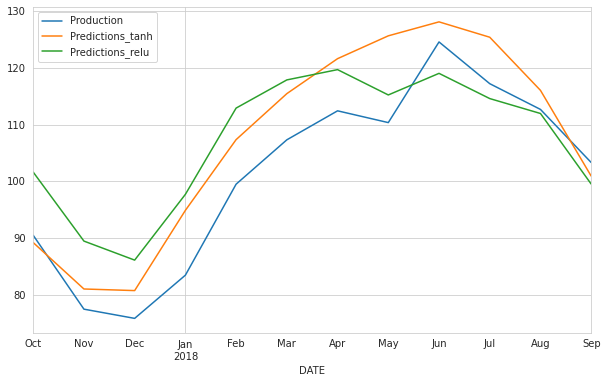

In [94]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [95]:
eval_metrics(compare.Production, compare.Predictions_relu)

r2_score: 0.647070035066948 
mae: 8.044174596329345 
mse: 83.22818648223162 
rmse: 9.122948343722637


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [96]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [97]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [98]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=10)

Epoch 1/10
561/561 [==============================] - 15s 19ms/step - loss: 0.0283
Epoch 2/10
561/561 [==============================] - 11s 20ms/step - loss: 0.0127
Epoch 3/10
561/561 [==============================] - 11s 19ms/step - loss: 0.0077
Epoch 4/10
561/561 [==============================] - 12s 22ms/step - loss: 0.0081
Epoch 5/10
561/561 [==============================] - 13s 23ms/step - loss: 0.0072
Epoch 6/10
561/561 [==============================] - 13s 23ms/step - loss: 0.0071
Epoch 7/10
561/561 [==============================] - 13s 23ms/step - loss: 0.0071
Epoch 8/10
561/561 [==============================] - 13s 23ms/step - loss: 0.0065
Epoch 9/10
561/561 [==============================] - 13s 23ms/step - loss: 0.0069
Epoch 10/10
561/561 [==============================] - 13s 22ms/step - loss: 0.0064


In [99]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [100]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[116.19396429],
       [113.80849869],
       [113.68647464],
       [116.5976989 ],
       [119.88018616],
       [122.84673994],
       [122.88925773],
       [124.3494239 ],
       [124.87062704],
       [122.32799481],
       [120.88403292],
       [119.86689199]])

In [101]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [102]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [103]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,116.194
2019-11-01,113.808
2019-12-01,113.686
2020-01-01,116.598
2020-02-01,119.880
2020-03-01,122.847
2020-04-01,122.889
2020-05-01,124.349
2020-06-01,124.871
2020-07-01,122.328


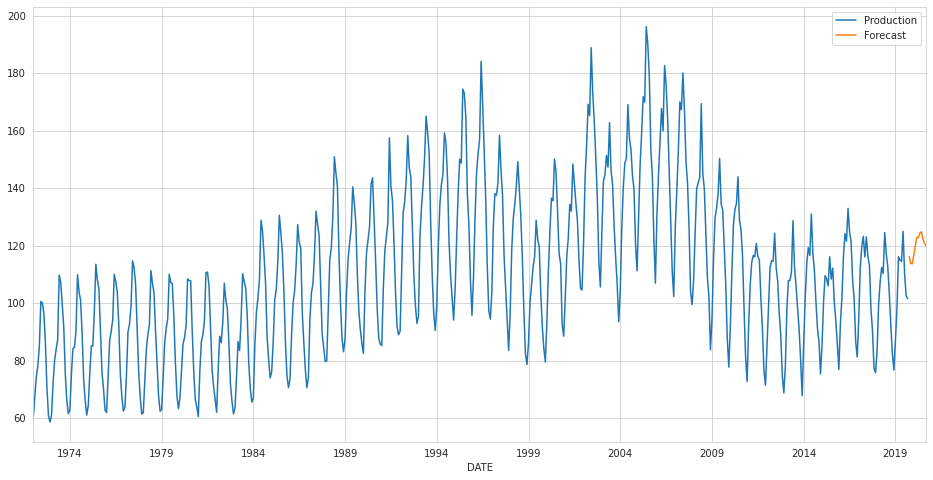

In [104]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

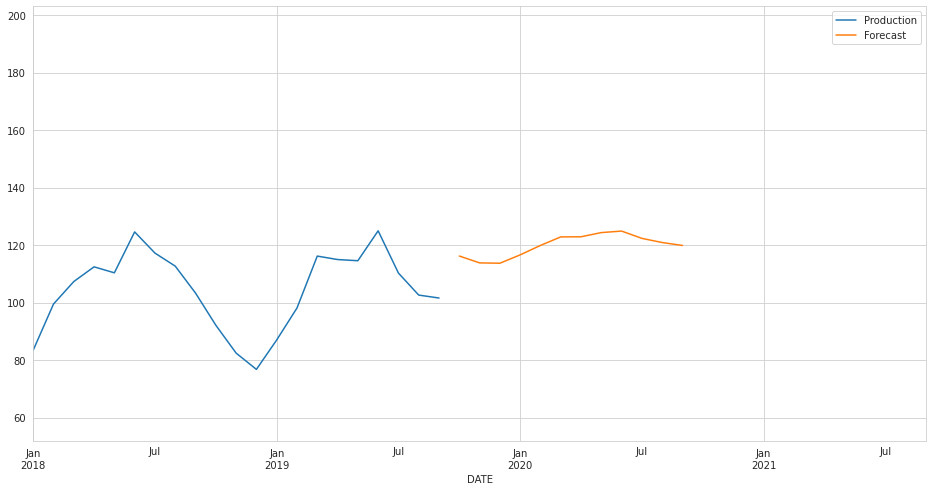

In [105]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')